## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
paths = []
labels = []
for dirname, _ , filenames in os.walk( "C:\\Users\\rutuj\\OneDrive\\Desktop\\Desktop\\audio_processing\\TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        #print(filename)
        labels.append(filename.split("_")[-1].split(".")[0].lower())
print("Dataset is loaded")

Dataset is loaded


In [3]:
len(paths)

6529

In [4]:
paths[:5]

['C:\\Users\\rutuj\\OneDrive\\Desktop\\Desktop\\audio_processing\\test\\1694496952439w37wu2hp-voicemaker.in-speech.mp3',
 'C:\\Users\\rutuj\\OneDrive\\Desktop\\Desktop\\audio_processing\\test\\1694497015786a38vcpc-voicemaker.in-speech.mp3',
 'C:\\Users\\rutuj\\OneDrive\\Desktop\\Desktop\\audio_processing\\test\\angry\\1001_DFA_ANG_XX.wav',
 'C:\\Users\\rutuj\\OneDrive\\Desktop\\Desktop\\audio_processing\\test\\angry\\1001_IEO_ANG_HI.wav',
 'C:\\Users\\rutuj\\OneDrive\\Desktop\\Desktop\\audio_processing\\test\\angry\\1001_IEO_ANG_LO.wav']

In [5]:
labels[:5]

['1694496952439w37wu2hp-voicemaker',
 '1694497015786a38vcpc-voicemaker',
 'xx',
 'hi',
 'lo']

In [6]:
## Create a dataframe
df = pd.DataFrame({"file_path": paths, "emotion_type": labels})
df.head()

,file_path,emotion_type
0,C:\Users\rutuj\OneDrive\Desktop\Desktop\audio_...,1694496952439w37wu2hp-voicemaker
1,C:\Users\rutuj\OneDrive\Desktop\Desktop\audio_...,1694497015786a38vcpc-voicemaker
2,C:\Users\rutuj\OneDrive\Desktop\Desktop\audio_...,xx
3,C:\Users\rutuj\OneDrive\Desktop\Desktop\audio_...,hi
4,C:\Users\rutuj\OneDrive\Desktop\Desktop\audio_...,lo


In [7]:
df['emotion_type'].value_counts()

xx                                  5351
hi                                   390
lo                                   390
md                                   390
desktop                                5
1694496952439w37wu2hp-voicemaker       1
1694497015786a38vcpc-voicemaker        1
x                                      1
Name: emotion_type, dtype: int64

## Exploratory Data Analysis

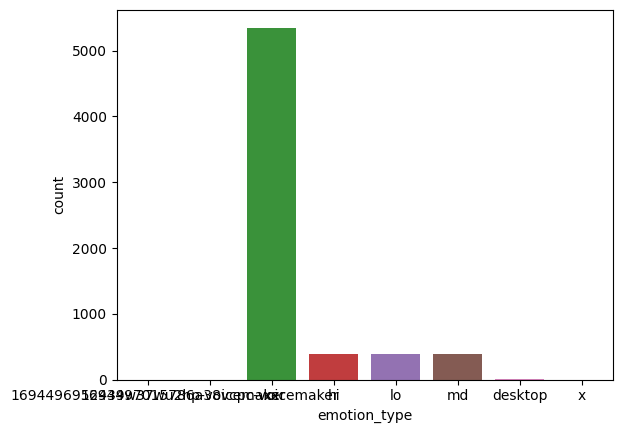

In [8]:
sns.countplot(x='emotion_type', data=df)
plt.show()

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

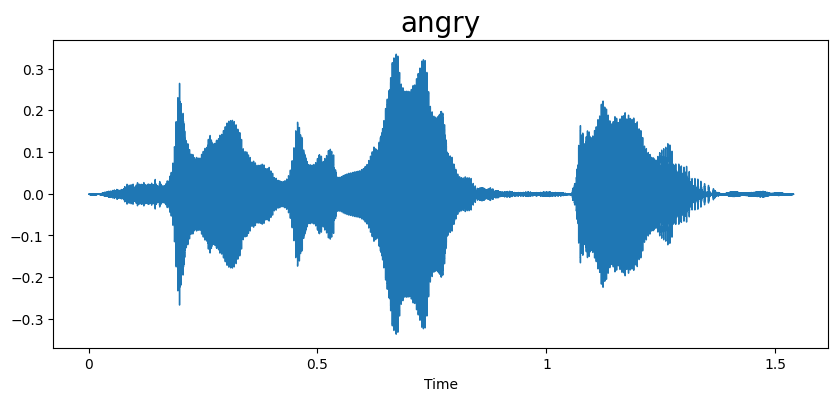

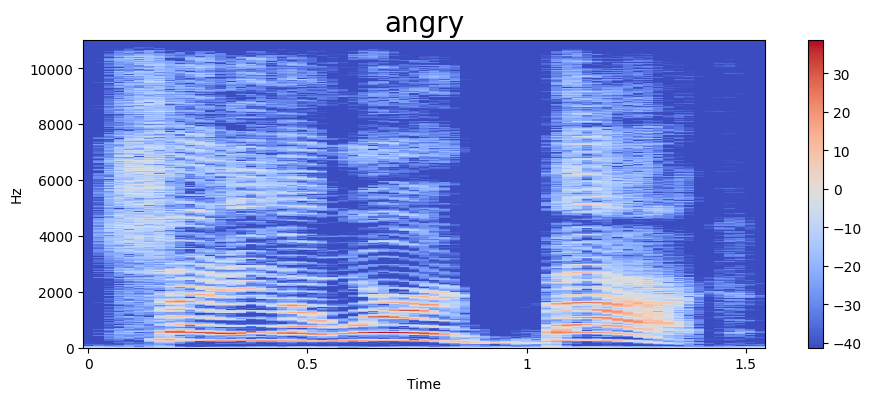

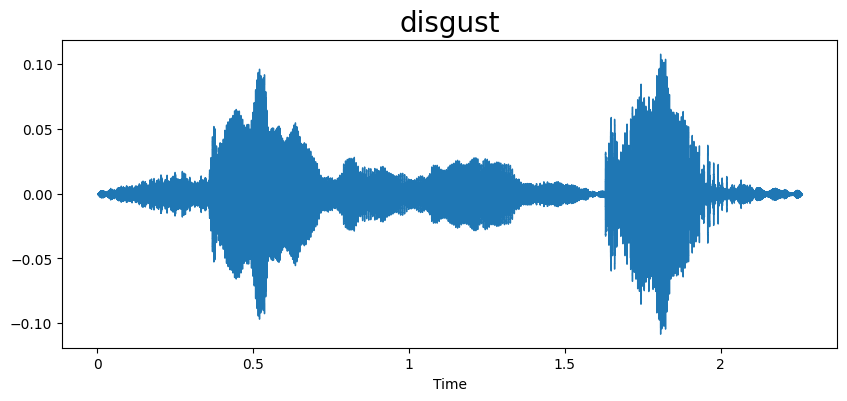

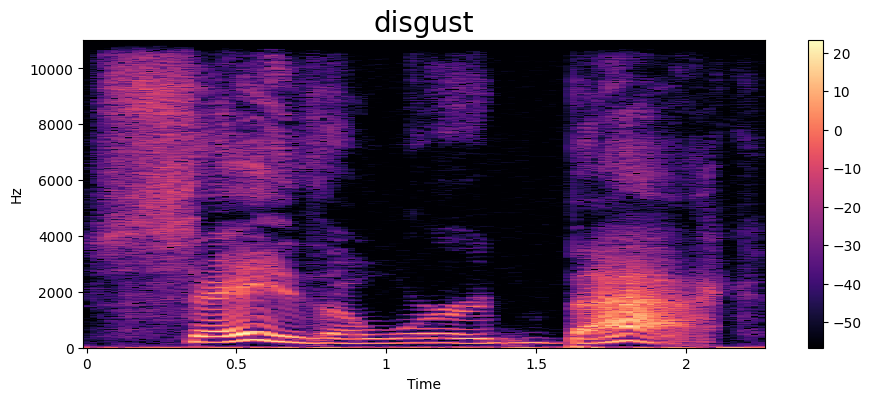

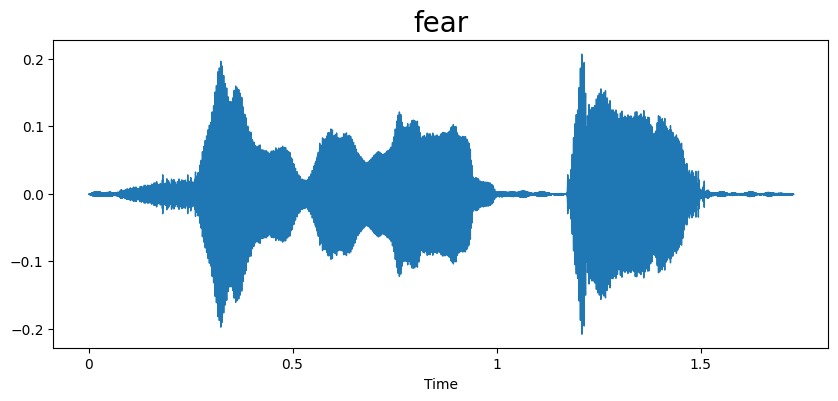

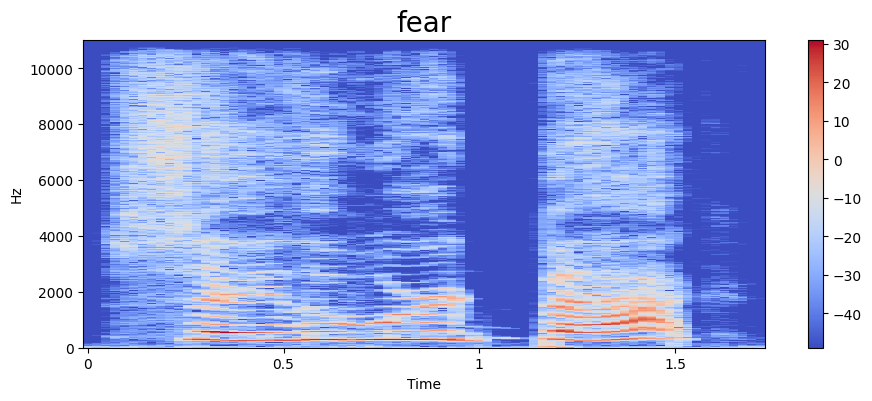

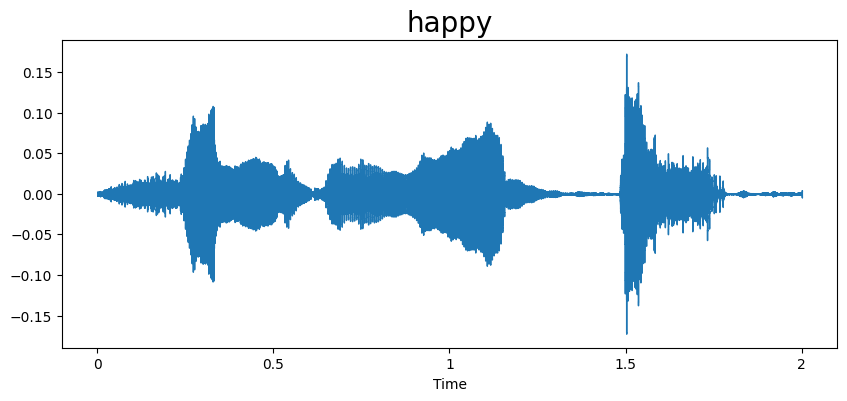

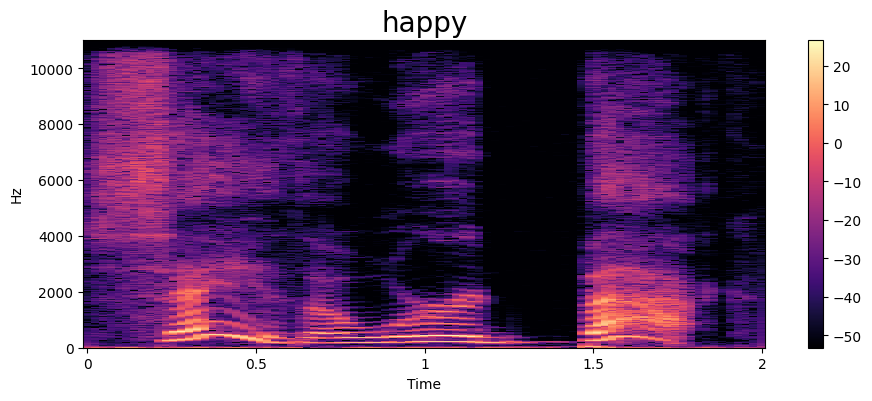

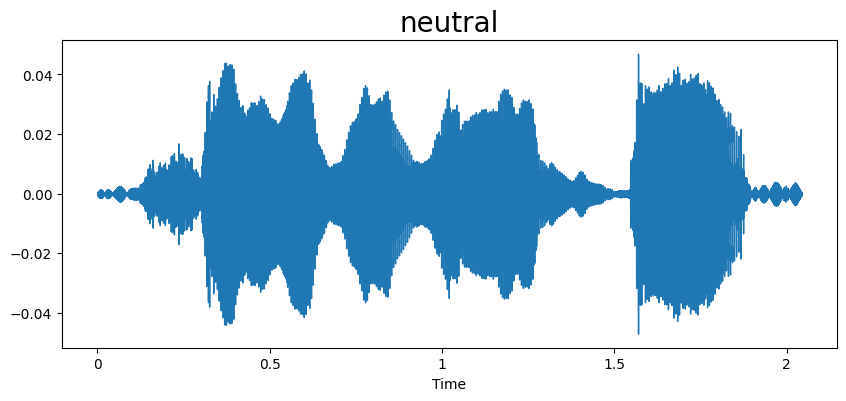

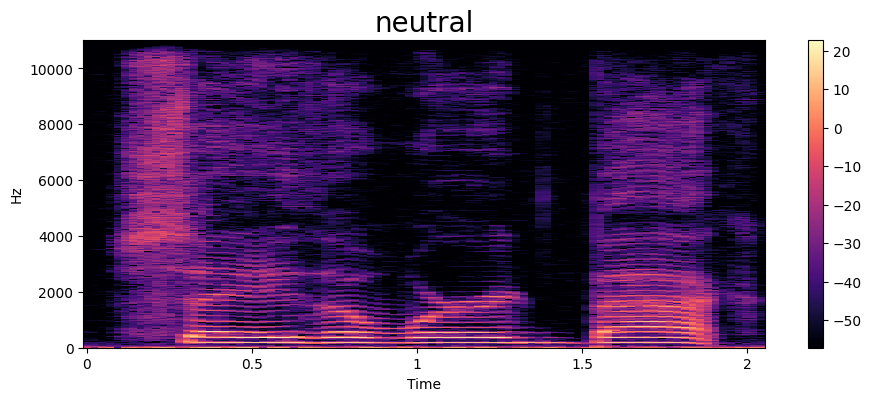

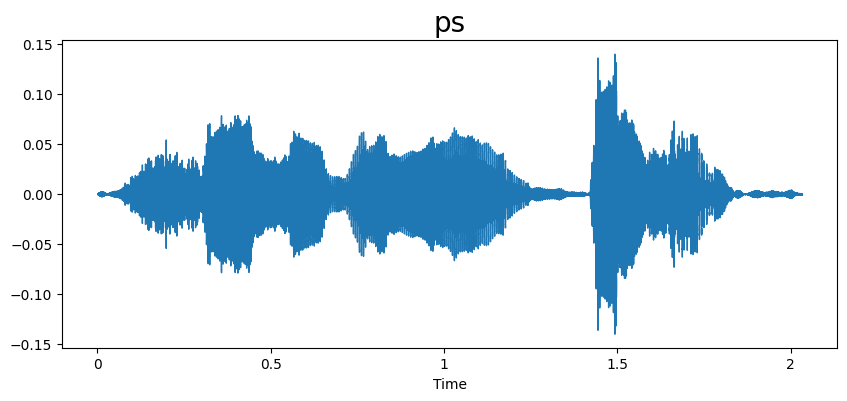

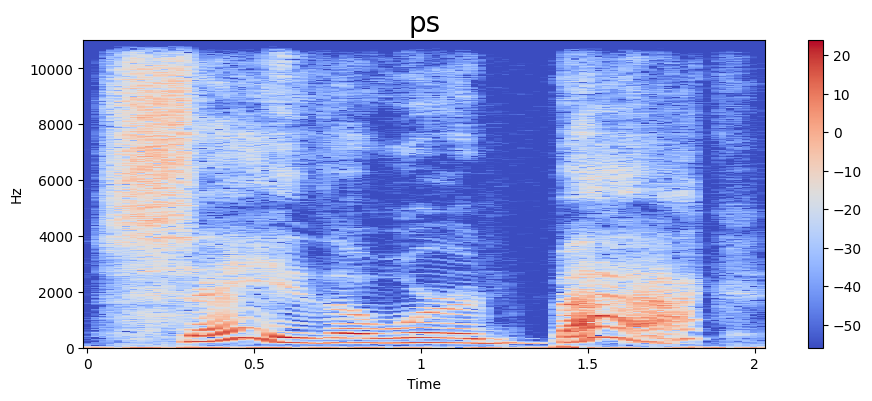

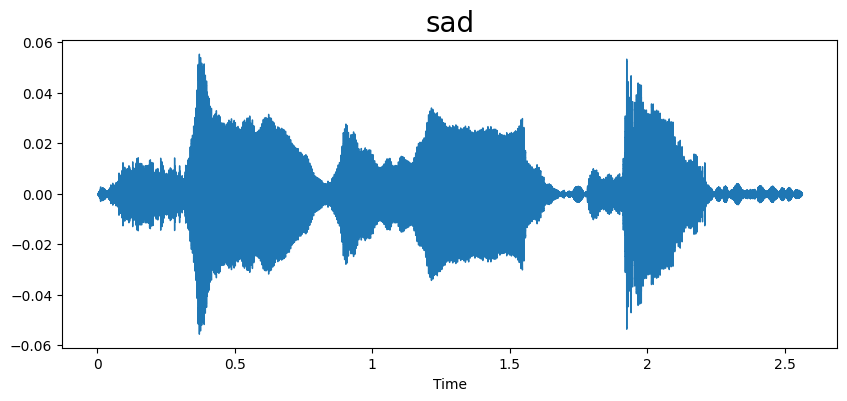

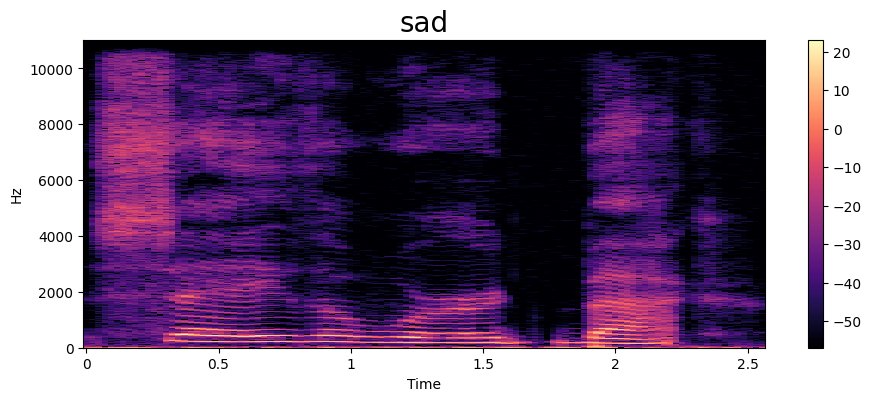

In [100]:
for emotion in df['emotion_type'].unique():
    path =df[df['emotion_type'] == emotion]['file_path'].iloc[0]
    data, sampling_rate = librosa.load(path)
    Audio(path)
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)


## Feature Extraction

In [101]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [102]:
extract_mfcc(df['file_path'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27551103e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722402e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915043e+00, -1.90649128e+00],
      dtype=float32)

In [108]:
X_mfcc = df['file_path'].apply(lambda x: extract_mfcc(x))

In [109]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600896, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.21709506, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54757, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: file_path, Length: 5600, dtype: object

In [110]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [111]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [124]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['emotion_type']])

In [125]:
y = y.toarray()

In [126]:
y.shape

(5600, 7)

## Create the LSTM Model

In [127]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 7)                

In [128]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
70/70 [==============================] - 11s 120ms/step - loss: 0.8456 - accuracy: 0.6719 - val_loss: 0.1510 - val_accuracy: 0.9571
Epoch 2/50
70/70 [==============================] - 8s 113ms/step - loss: 0.2678 - accuracy: 0.9123 - val_loss: 0.1425 - val_accuracy: 0.9634
Epoch 3/50
70/70 [==============================] - 8s 111ms/step - loss: 0.1659 - accuracy: 0.9484 - val_loss: 0.1195 - val_accuracy: 0.9634
Epoch 4/50
70/70 [==============================] - 8s 112ms/step - loss: 0.1330 - accuracy: 0.9594 - val_loss: 0.0226 - val_accuracy: 0.9946
Epoch 5/50
70/70 [==============================] - 8s 115ms/step - loss: 0.1128 - accuracy: 0.9652 - val_loss: 0.0531 - val_accuracy: 0.9812
Epoch 6/50
70/70 [==============================] - 8s 112ms/step - loss: 0.0722 - accuracy: 0.9795 - val_loss: 0.0288 - val_accuracy: 0.9902
Epoch 7/50
70/70 [==============================] - 8s 111ms/step - loss: 0.0692 - accuracy: 0.9783 - val_loss: 0.0338 - val_accuracy: 0.9911
Epoch

In [48]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

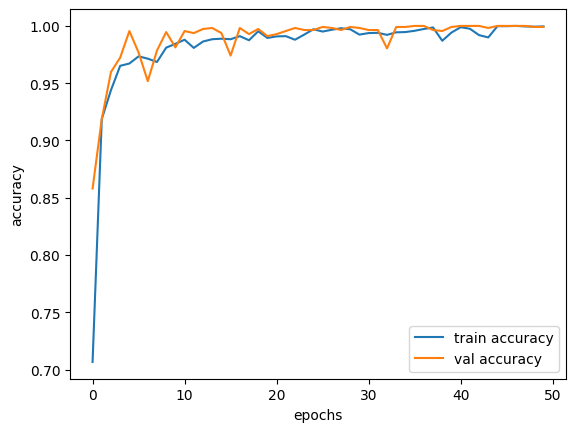

In [49]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

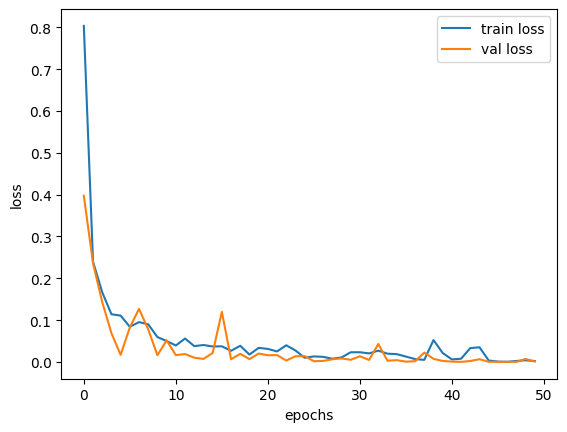

In [50]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Evaluation

In [132]:
test_loss, test_acc = model.evaluate(X, y, verbose=0)
print("Test Accuracy: ",test_acc)

Test Accuracy:  1.0


In [51]:
import pickle
pickle.dump(model, open('C:\\Users\\rutuj\\OneDrive\\Desktop\\Desktop\\audio_processing\\audio_detectionModel.pkl', 'wb'))